In [ ]:
import pandas as pd
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time

from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [ ]:
phish_data = pd.read_csv('phishing.csv') #reading the csv file

In [ ]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
phish_data.tail()

,URL,Label
15154,legacy.com/obituaries/herald/obituary.aspx?n=j...,good
15155,legacy.com/obituaries/herald/obituary.aspx?n=j...,good
15156,legacy.com/obituaries/heraldtribune/obituary.a...,good
15157,legacy.com/obituaries/heraldtribune/obituary.a...,good
15158,legacy.com/obituaries/heraldtribune/obituary.a...,good


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15159 entries, 0 to 15158
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     15159 non-null  object
 1   Label   15159 non-null  object
dtypes: object(2)
memory usage: 237.0+ KB


In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<Axes: ylabel='Label'>

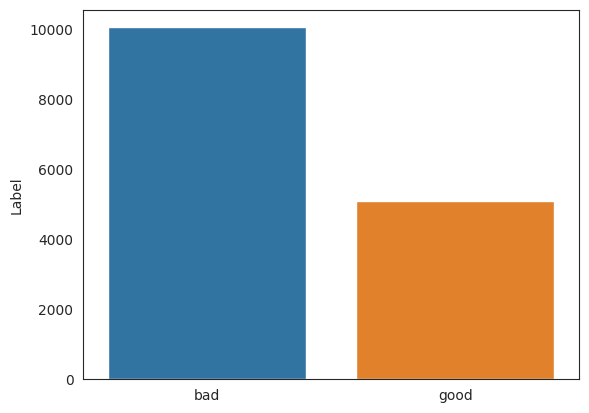

In [ ]:
#visualizing target_col for checking the number of good sites and the number of bad sites
sns.set_style('white')
sns.barplot(x=label_counts.index,y=label_counts.Label)

In [ ]:
#tokeniser is used to split the string using regular expression

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#only alplhabets are taken

In [ ]:
phish_data.URL[0]#trying it on one of the URL

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 0.11905603400009568 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
12127,kshs.org/kansapedia/john-james-ingalls/12095,good,"[kshs, org, kansapedia, john, james, ingalls]"
11721,kmvt.com/sports/22705354.html,good,"[kmvt, com, sports, html]"
9994,royalhantha-artgallery.com/private/bin/ssl/_id...,bad,"[royalhantha, artgallery, com, private, bin, s..."
1254,www.interlinebusinessdirectory.com/wp-content/...,bad,"[www, interlinebusinessdirectory, com, wp, con..."
12164,ksre.ksu.edu/huckboyd/95ksprof.htm,good,"[ksre, ksu, edu, huckboyd, ksprof, htm]"


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
5791,northernvirginiadivorceattorneys.com/del/,bad,"[northernvirginiadivorceattorneys, com, del]"
12989,lasallecollege.com/information/student-life.aspx,good,"[lasallecollege, com, information, student, li..."
10860,kendo-bogu.com/,good,"[kendo, bogu, com]"
4339,creditagosgos.cabanova.fr/page2.html,bad,"[creditagosgos, cabanova, fr, page, html]"
14540,lead411.com/Robert_Harmon_162871.html,good,"[lead, com, Robert, Harmon, html]"


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_tokenized'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.013588932999937242 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_sent
13737,lastcombat.com/Lesa_Lewis_vs_Nancy_Lewis.html,good,"[lastcombat, com, Lesa, Lewis, vs, Nancy, Lewi...",lastcombat com Lesa Lewis vs Nancy Lewis html
7197,sprivetom.interzet.ru/modules/index_cadastrar_...,bad,"[sprivetom, interzet, ru, modules, index, cada...",sprivetom interzet ru modules index cadastrar ...
218,www.panda-forumx.tk/login.asp?ref=us.battle.ne...,bad,"[www, panda, forumx, tk, login, asp, ref, us, ...",www panda forumx tk login asp ref us battle ne...
1906,totallynews.net/v1/bin/_ssl1/www.paypal.com/fr...,bad,"[totallynews, net, v, bin, ssl, www, paypal, c...",totallynews net v bin ssl www paypal com fr cg...
6265,www.firdalej.waw.pl/wp-content/uploads/2012/10...,bad,"[www, firdalej, waw, pl, wp, content, uploads,...",www firdalej waw pl wp content uploads start d...


In [ ]:
#CountVectorizer is a model used to transform a corpora of text to a vector of term or token counts #removing uppercase,lower case and numbers
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:4].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
lr = LogisticRegression() #it is used for prediction

In [ ]:
ser = pd.Series(phish_data.Label)#we are creating a one dimensional array

In [ ]:
print(ser)

0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
15154    good
15155    good
15156    good
15157    good
15158    good
Name: Label, Length: 15159, dtype: object


In [ ]:
ser2 = ser.dropna()#it is used to drop Nan

In [ ]:
print(ser2)

0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
15154    good
15155    good
15156    good
15157    good
15158    good
Name: Label, Length: 15159, dtype: object


In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, ser2)#splitting

In [ ]:
lr.fit(trainX,trainY)

LogisticRegression()

In [ ]:
lr.score(testX,testY)#accuracy score

0.9635883905013193

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Logistic Regression: 

Training Accuracy : 0.9926994458615533
Testing Accuracy : 0.9635883905013193

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.96      0.98      0.97      2478
        Good       0.96      0.93      0.95      1312

    accuracy                           0.96      3790
   macro avg       0.96      0.96      0.96      3790
weighted avg       0.96      0.96      0.96      3790


CONFUSION MATRIX


<Axes: >

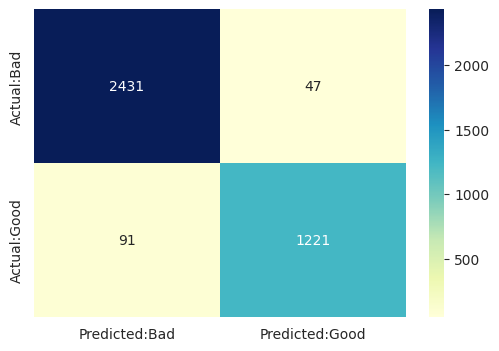

In [ ]:
print('Logistic Regression: \n')
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))
#confusion matrix to see the predicted and the actual results
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

###Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithm based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [ ]:
mnb.score(testX,testY)#accuracy

0.941952506596306

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Multinomial Naive Bayesian:

Training Accuracy : 0.9851350162723195
Testing Accuracy : 0.941952506596306

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.94      0.96      2644
        Good       0.87      0.96      0.91      1146

    accuracy                           0.94      3790
   macro avg       0.92      0.95      0.93      3790
weighted avg       0.95      0.94      0.94      3790


CONFUSION MATRIX


<Axes: >

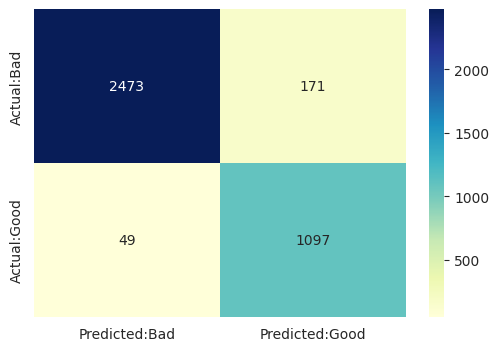

In [ ]:
print('Multinomial Naive Bayesian:\n')
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))
#confusion matrix to see the predicted and the actual results
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Applying N-gram model in order to create a word level n-gram in order
to group adjacent words using TfidfVectorizer and taking using word analyser, here the n-gram can be defined to be of any length based on best accuracy using bi-gram in our case

In [ ]:
# Generate word 2-grams using TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))
feature = cv.fit_transform(phish_data.text_sent)

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label, test_size=0.2, random_state=42)


In [ ]:
# train a random forest classifier on the data
clf = RandomForestClassifier()
clf.fit(trainX, trainY)

# Make predictions on the test set and calculate accuracy
predY = clf.predict(testX)
ngram_acc = accuracy_score(testY, predY)
print("Accuracy:", ngram_acc)


Accuracy: 0.9610817941952506


In [ ]:
Scores_ml['Bi-gram']=np.round(ngram_acc,2)

Bi-gram model: 

Training Accuracy: 1.0
Testing Accuracy: 0.9610817941952506
Classification Report:
               precision    recall  f1-score   support

         Bad       0.98      0.96      0.97      2052
        Good       0.92      0.97      0.94       980

    accuracy                           0.96      3032
   macro avg       0.95      0.96      0.96      3032
weighted avg       0.96      0.96      0.96      3032


CONFUSION MATRIX


<Axes: >

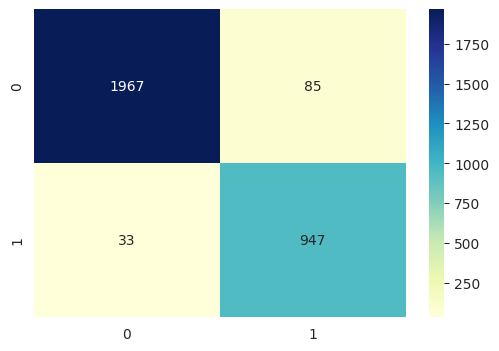

In [ ]:
print('Bi-gram model: \n')
# calculate training accuracy
train_pred = clf.predict(trainX)
train_acc = accuracy_score(trainY, train_pred)
print("Training Accuracy:", train_acc)

# calculate testing accuracy
test_pred = clf.predict(testX)
test_acc = accuracy_score(testY, test_pred)
print("Testing Accuracy:", test_acc)

# print classification report
class_report = classification_report(testY, test_pred, target_names=['Bad', 'Good'])
print("Classification Report:\n", class_report)

# plot confusion matrix
con_mat = confusion_matrix(testY, test_pred)
con_mat_df = pd.DataFrame(con_mat, columns=['Predicted: Bad', 'Predicted: Good'], index=['Actual: Bad', 'Actual: Good'])
#confusion matrix to see the predicted and the actual results
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


<Axes: ylabel='Accuracy'>

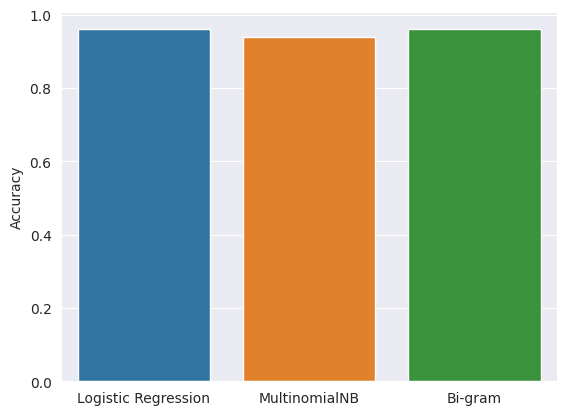

In [ ]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index,y=acc.Accuracy)
#comparing all three models

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english',ngram_range=(2, 2),analyzer='char'), LogisticRegression())



In [ ]:
trainX, testX, trainY, testY = train_test_split(phish_data.text_sent, phish_data.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer='char', ngram_range=(2, 2),
                                 stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY) #accuracy

0.970448548812665

Combined Pipeline model: 

Training Accuracy : 0.9868062274606386
Testing Accuracy : 0.970448548812665

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.98      0.98      2473
        Good       0.96      0.96      0.96      1317

    accuracy                           0.97      3790
   macro avg       0.97      0.97      0.97      3790
weighted avg       0.97      0.97      0.97      3790


CONFUSION MATRIX


<Axes: >

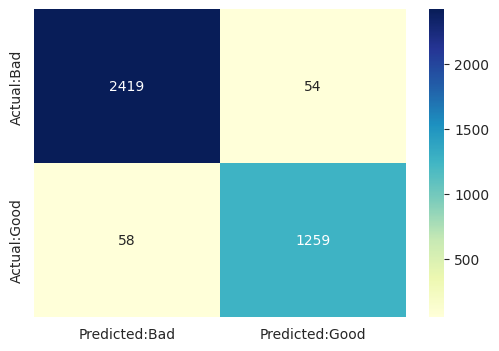

In [ ]:
print('Combined Pipeline model: \n')
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))
#confusion matrix to see the predicted and the actual results
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.970448548812665


In [ ]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['legacy.com/obituaries','youtube.com/watch?v=qI0TQJI3vdU','lasallecollege.ac.id/','kick-it.org/events']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


In [ ]:
#visualisation techniques
#shows the keywords in bad sites and in good sites
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobell it ffb d dca cce f login SkyPe com en c...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbys com paypal cgi bin get into herf ...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...",mail printakid com www online americanexpress ...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydregs com wp content themes widescre...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_sent
10055,kansascity-missouri.com/,good,"[kansascity, missouri, com]",kansascity missouri com
10056,kansascity-missouri.com/attractions/,good,"[kansascity, missouri, com, attractions]",kansascity missouri com attractions
10057,kansascity-north-realestate.com/,good,"[kansascity, north, realestate, com]",kansascity north realestate com
10058,kansascity-plus.com/fairfield-inn-kansas-city-...,good,"[kansascity, plus, com, fairfield, inn, kansas...",kansascity plus com fairfield inn kansas city ...
10059,kansascity.bbb.org/,good,"[kansascity, bbb, org]",kansascity bbb org


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
  stopwords = set(STOPWORDS)
  more_stopwords = {'com','http'}
  stopwords = stopwords.union(more_stopwords)

  wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
  wordcloud.generate(text)

  plt.figure(figsize=figure_size)
  if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
  else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
  plt.axis('off');
  plt.tight_layout()

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

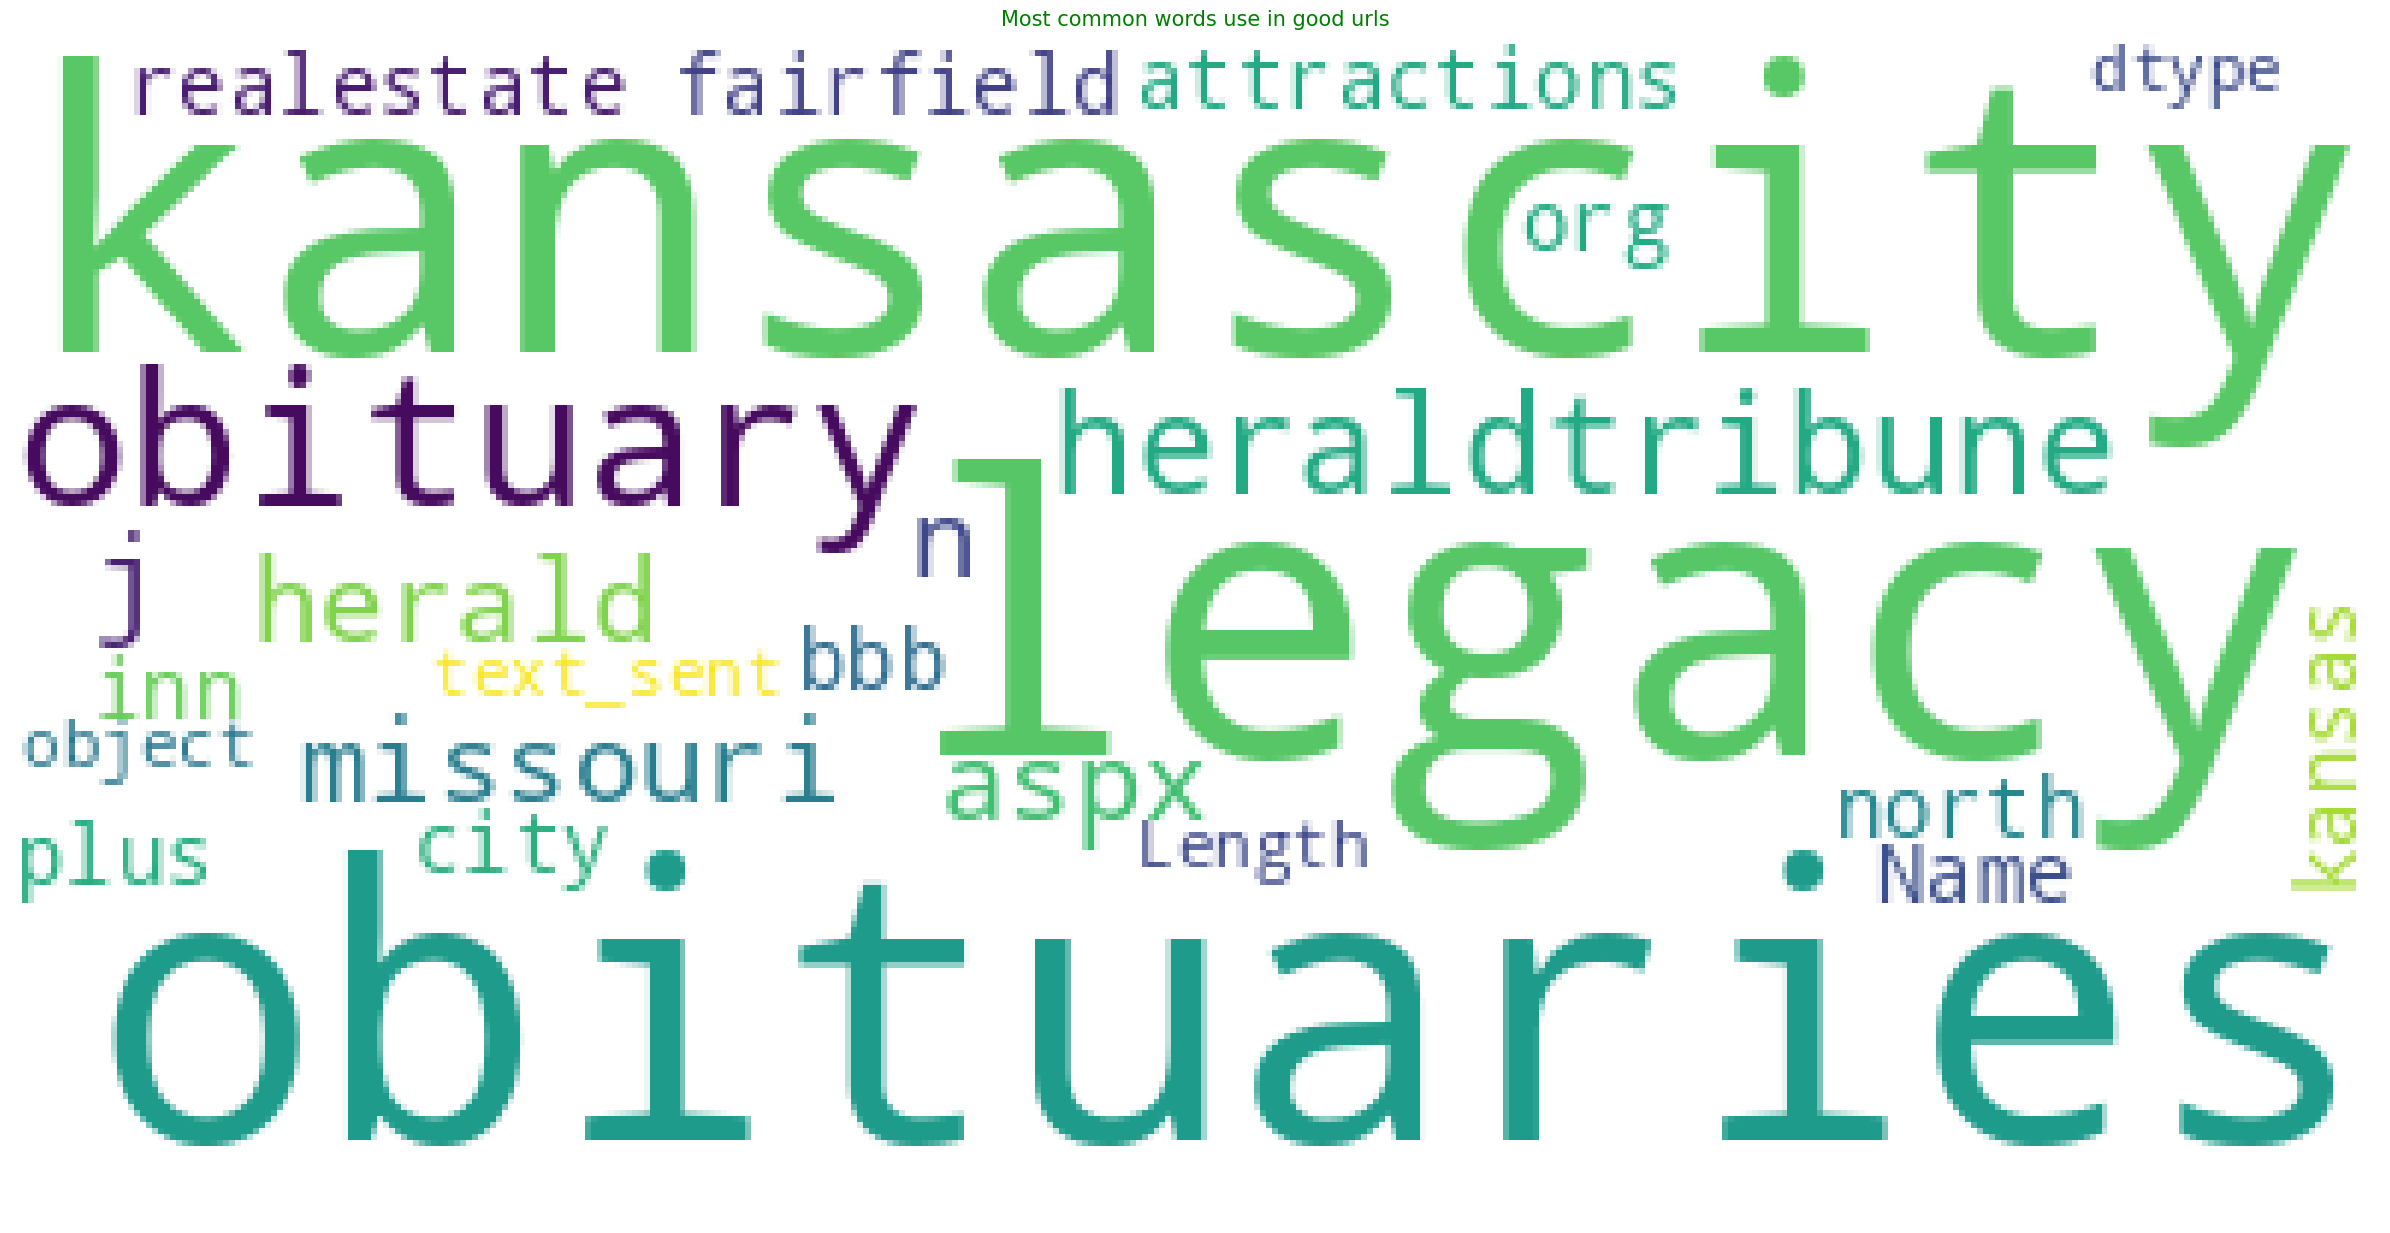

In [ ]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120,
               title = 'Most common words use in good urls', title_size=15)

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

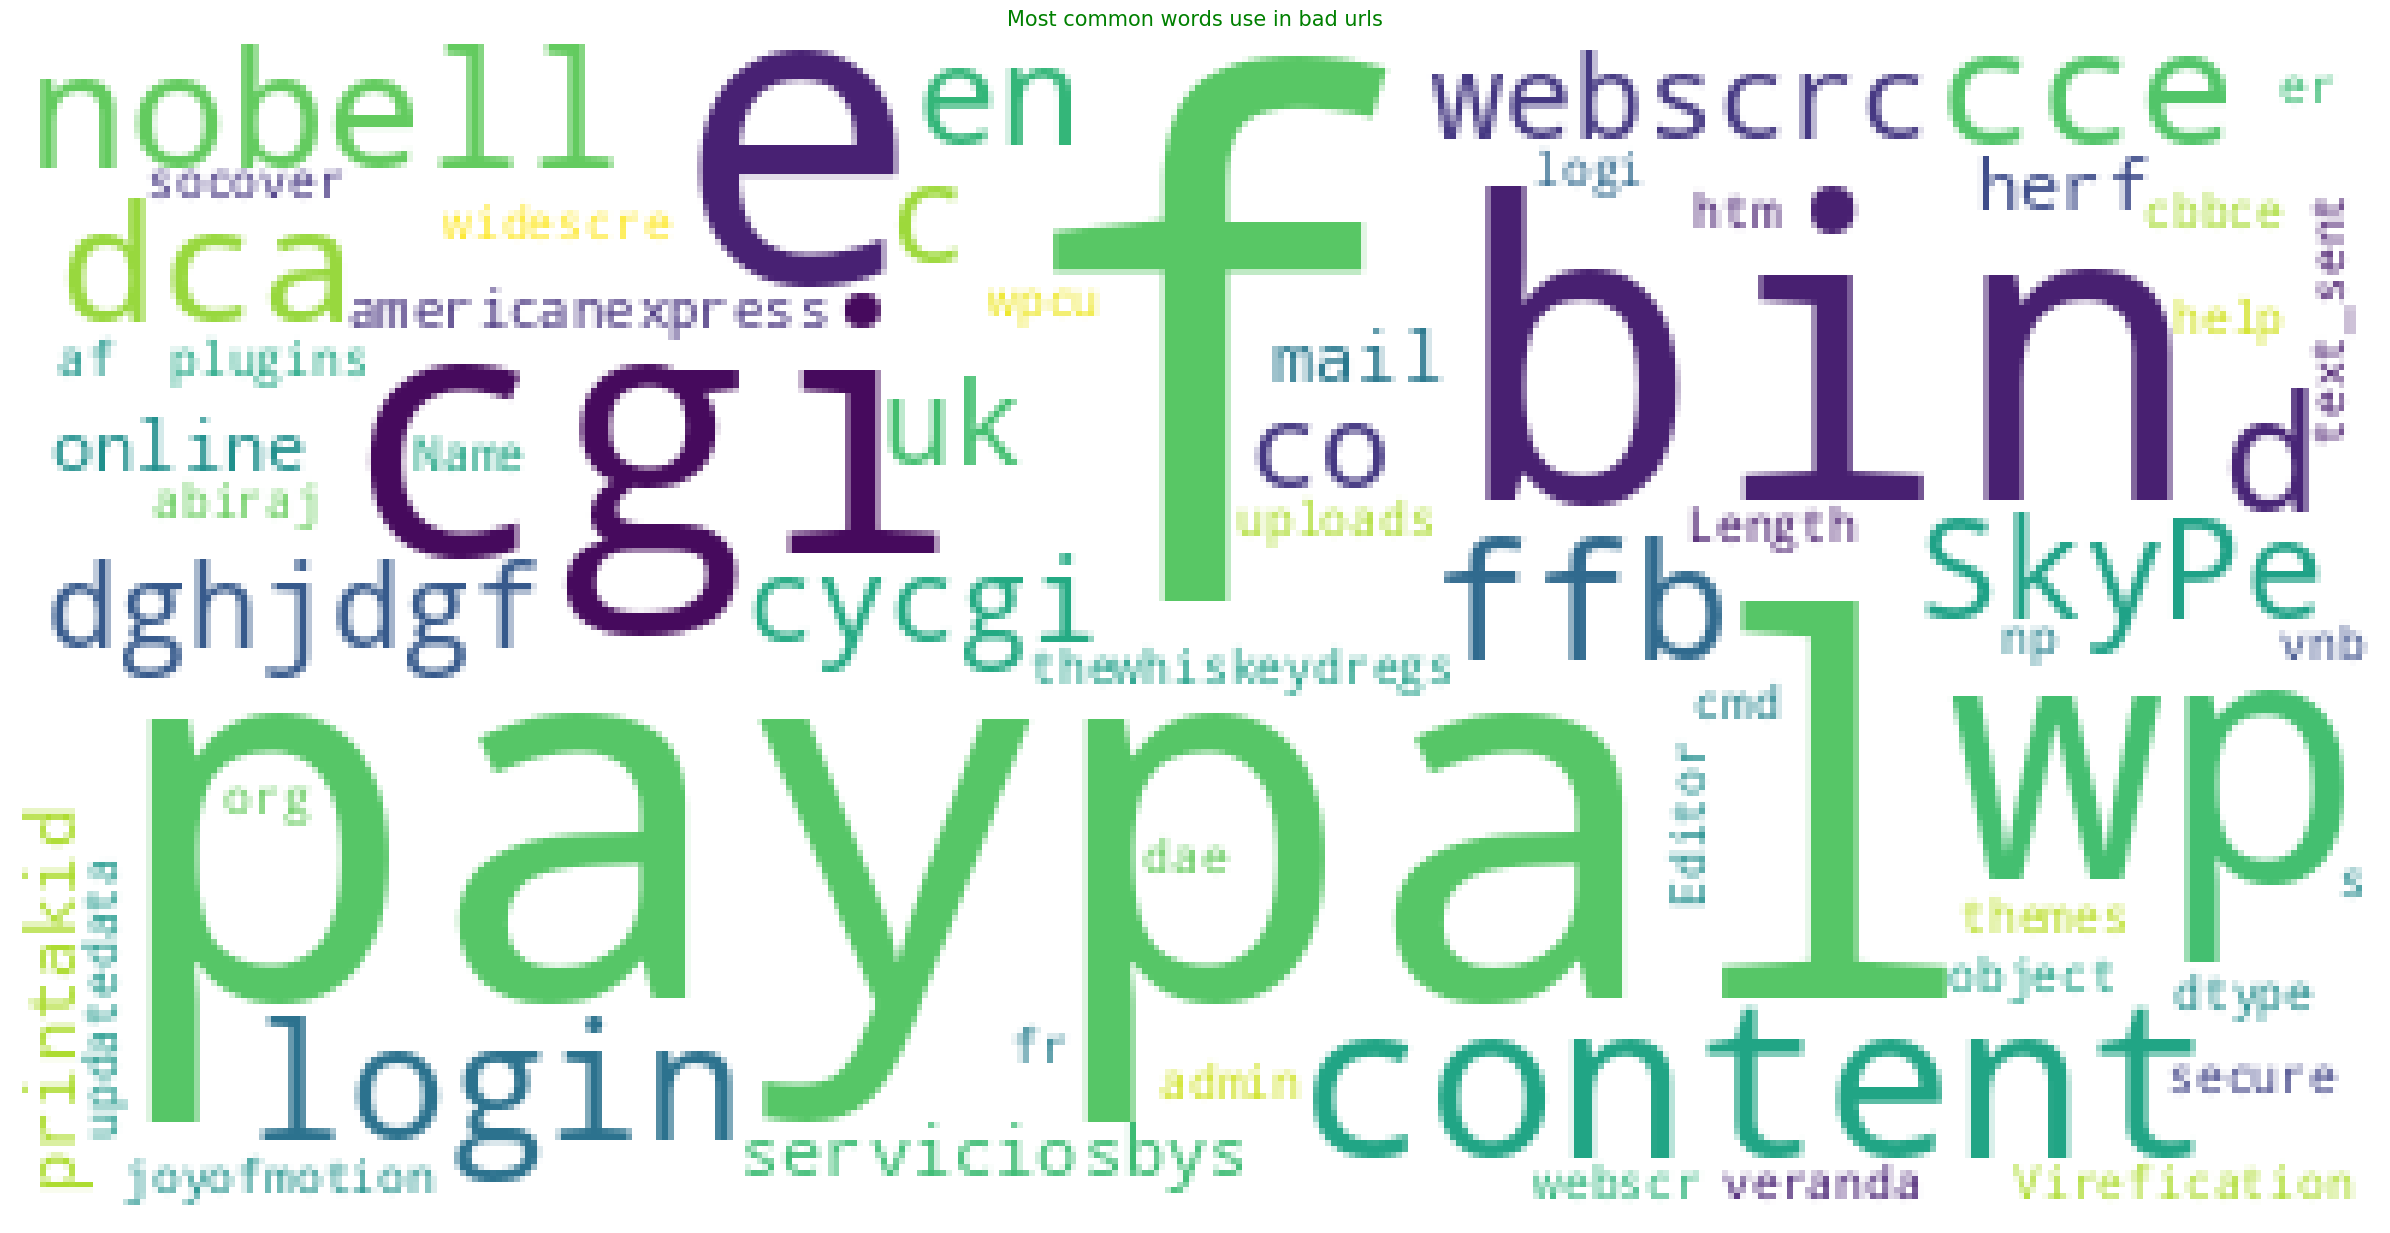

In [ ]:
common_text = str(data)
plot_wordcloud(common_text, max_words=400, max_font_size=120,
               title = 'Most common words use in bad urls', title_size=15)